## Python Project EDA & Data Visualization - Telco Customer Churn


### Steps

##### 1. Importing all dependenices (libararies)
##### 2. loading datasets
##### 3. initial exploration
##### 4. Data cleaning
##### 5. Data Analysis

#### Step 1: Importing All Dependenices (Libararies)¶

In [202]:
!pip install kaggle
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from urllib.parse import quote_plus

%matplotlib inline

#### Step 2: Downloading and Extracting Dataset from Kaggle

In [204]:
os.environ['KAGGLE_CONFIG_DIR'] = "C:/Users/.kaggle/kaggle.json"

In [205]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [206]:
print(os.listdir())

['.anaconda', '.android', '.bash_history', '.conda', '.condarc', '.continuum', '.emulator_console_auth_token', '.gitconfig', '.gradle', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.matplotlib', '.node_repl_history', '.opera', '.vscode', '3D Objects', 'airbnb_data_encoded.csv', 'anaconda3', 'anaconda_projects', 'Android Studio', 'AndroidStudioProjects', 'AppData', 'Application Data', 'churn_data', 'cleaned_airbnb_data.csv', 'cleaned_churn_data.csv', 'Contacts', 'Cookies', 'customer-churn-data', 'dim_host.csv', 'dim_license.csv', 'dim_location.csv', 'dim_property.csv', 'Documents', 'Downloads', 'fact_listing.csv', 'Favorites', 'IntelGraphicsProfiles', 'kaggle', 'Links', 'Local Settings', 'Music', 'My Application(0).zip', 'My Documents', 'NetHood', 'New York Airbnb Open Data 2024.ipynb', 'new-york-dataset.zip', 'Newyork_2024_clean.csv', 'Newyork_clean.csv', 'newyork_data', 'npm-cache', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-00

In [211]:
import zipfile

with zipfile.ZipFile("telco-customer-churn.zip", 'r') as zip_ref:
    zip_ref.extractall("customer-churn-data")  # This will create a folder and extract contents


In [213]:
print(os.listdir("customer-churn-data"))

['.ipynb_checkpoints', 'Telco-Customer-Churn.csv', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']


#### Step 3: Initial Exploration

In [216]:
data = pd.read_csv('customer-churn-data/Telco-Customer-Churn.csv', encoding_errors='ignore')

In [218]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [220]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [222]:
data.shape

(7043, 21)

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Step 4: Data Cleaning

#### Fix Inconsistencies (e.g 'Yes'/'yes'/'Y')

In [228]:
# Strip spaces and lowercase all string values
data = data.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


C:\Users\wasee\AppData\Local\Temp\ipykernel_13960\1510202383.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [230]:
# Standard replacements (mapping inconsistent values)
replace_map = {
    'yes': 'Yes', 'y': 'Yes',
    'no': 'No', 'n': 'No',
    'no phone service': 'No phone service',
    'no internet service': 'No internet service',
    'dsl': 'DSL', 'fiber optic': 'Fiber optic'
}

In [232]:
data.replace(replace_map, inplace=True)

In [234]:
# Capitalize cleaned categorical columns for consistency (optional)
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.title()

In [236]:
# after fixing the inconsistencies check the info of the data
data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-Vhveg  Female              0     Yes         No       1   
1     5575-Gnvde    Male              0      No         No      34   
2     3668-Qpybk    Male              0      No         No       2   
3     7795-Cfocw    Male              0      No         No      45   
4     9237-Hqitu  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-Resvb    Male              0     Yes        Yes      24   
7039  2234-Xaduh  Female              0     Yes        Yes      72   
7040  4801-Jzazl  Female              0     Yes        Yes      11   
7041  8361-Ltmkd    Male              1     Yes         No       4   
7042  3186-Ajiek    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No Phone Service             Dsl 

####  Handle Missing Values

In [239]:
# Handle 'TotalCharges' (already handled before, but adding again just in case)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Check if any other columns have missing values
missing_cols = data.columns[data.isnull().any()].tolist()

C:\Users\wasee\AppData\Local\Temp\ipykernel_13960\3062969602.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [241]:
# Fill other missing values if present
for col in missing_cols:
    if data[col].dtype == 'object':
        # Fill with mode for categorical columns
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        # Fill with median for numerical columns
        data[col].fillna(data[col].median(), inplace=True)

# Final check
print("\nAfter filling, missing values per column:\n")
print(data.isnull().sum())


After filling, missing values per column:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### Remove duplicates

In [244]:
# dealing with duplicates rows
data.duplicated().sum()

# deleting all duplicated rows
# data[data.duplicated()]

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

#### Convert data types

In [247]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [249]:
# Convert 'SeniorCitizen' to 'Yes'/'No'
data['SeniorCitizen'] = data['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [251]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')

In [253]:
# Convert columns with categorical data to 'category' dtype for memory efficiency
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

In [255]:
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Convert 'tenure', 'MonthlyCharges', and 'TotalCharges' to appropriate numeric types
data['tenure'] = data['tenure'].astype('int64')
data['MonthlyCharges'] = data['MonthlyCharges'].astype('float64')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  # Fix any issues in 'TotalCharges'


In [257]:
#verify the data types after type casting
print(data.dtypes)

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [259]:
data.info

<bound method DataFrame.info of       customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-Vhveg  Female            No     Yes         No       1   
1     5575-Gnvde    Male            No      No         No      34   
2     3668-Qpybk    Male            No      No         No       2   
3     7795-Cfocw    Male            No      No         No      45   
4     9237-Hqitu  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-Resvb    Male            No     Yes        Yes      24   
7039  2234-Xaduh  Female            No     Yes        Yes      72   
7040  4801-Jzazl  Female            No     Yes        Yes      11   
7041  8361-Ltmkd    Male           Yes     Yes         No       4   
7042  3186-Ajiek    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No Phone Service             Dsl             

#### Handle outliers

In [262]:
# Define numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate Q1, Q3, and IQR
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers: values outside 1.5*IQR from the Q1 and Q3
outliers_iqr = (data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))

# Identify rows with outliers based on IQR
outliers_iqr_data = data[outliers_iqr.any(axis=1)]
print("Outliers detected:")
print(outliers_iqr_data)

# Remove the rows with outliers
data_cleaned = data[~outliers_iqr.any(axis=1)]

# Check the shape of the cleaned data
print("Shape of cleaned data:", data_cleaned.shape)


Outliers detected:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Shape of cleaned data: (7043, 21)


#### Step 5: Exploratory Data Analysis

#### Univariate Analysis (Numerical Variables)

In [266]:
# Descriptive statistics for numerical variables
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_stats = data[numerical_columns].describe()
print(numerical_stats)


            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


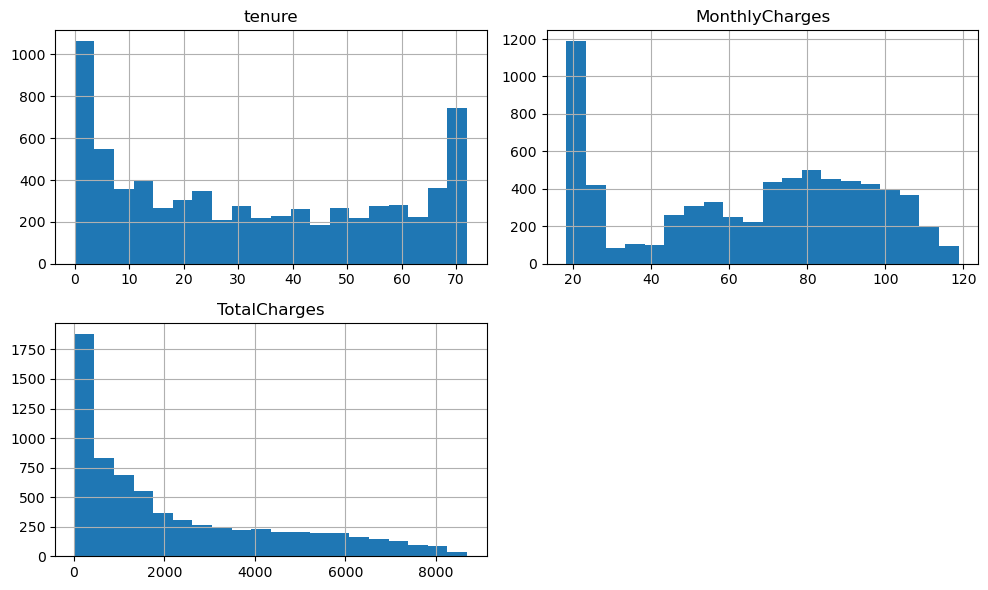

In [268]:
# Plot histograms for numerical columns
data[numerical_columns].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

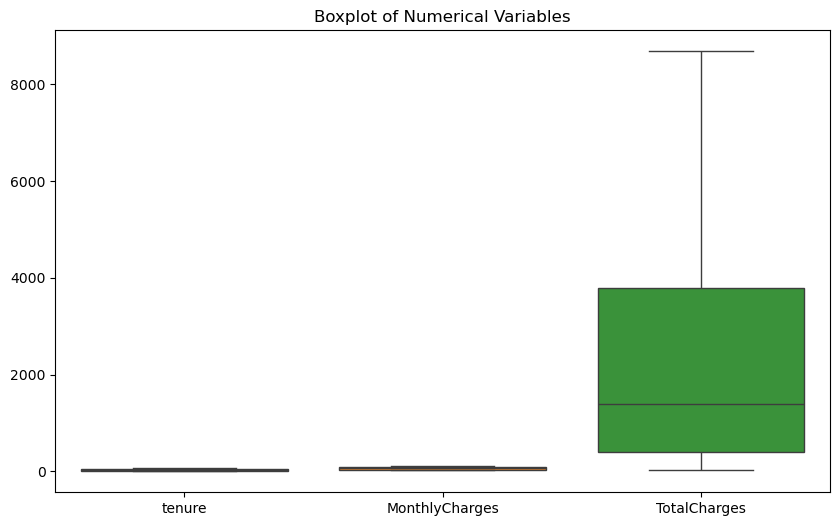

In [270]:
# Boxplots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Boxplot of Numerical Variables')
plt.show()

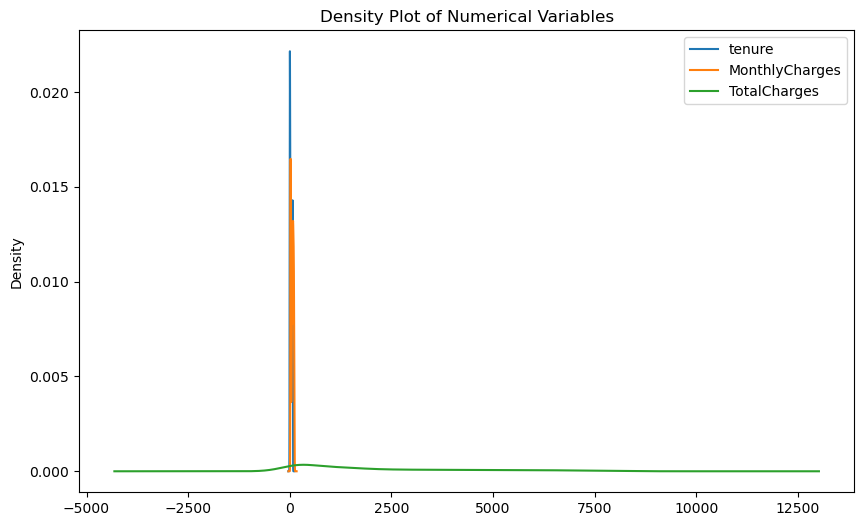

In [272]:
# Density plots for numerical columns
data[numerical_columns].plot(kind='density', figsize=(10, 6))
plt.title('Density Plot of Numerical Variables')
plt.show()

#### Univariate Analysis (Categorical Variables)

In [275]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    counts = data[col].value_counts()
    pct   = data[col].value_counts(normalize=True) * 100
    print(f"\n--- {col} ---")
    print(pd.concat([counts, pct.rename('%')], axis=1))



--- gender ---
        count         %
gender                 
Male     3555  50.47565
Female   3488  49.52435

--- SeniorCitizen ---
               count          %
SeniorCitizen                  
No              5901  83.785319
Yes             1142  16.214681

--- Partner ---
         count         %
Partner                 
No        3641  51.69672
Yes       3402  48.30328

--- Dependents ---
            count          %
Dependents                  
No           4933  70.041176
Yes          2110  29.958824

--- PhoneService ---
              count          %
PhoneService                  
Yes            6361  90.316626
No              682   9.683374

--- MultipleLines ---
                  count          %
MultipleLines                     
No                 3390  48.132898
Yes                2971  42.183729
No Phone Service    682   9.683374

--- InternetService ---
                 count          %
InternetService                  
Fiber Optic       3096  43.958540
Dsl          

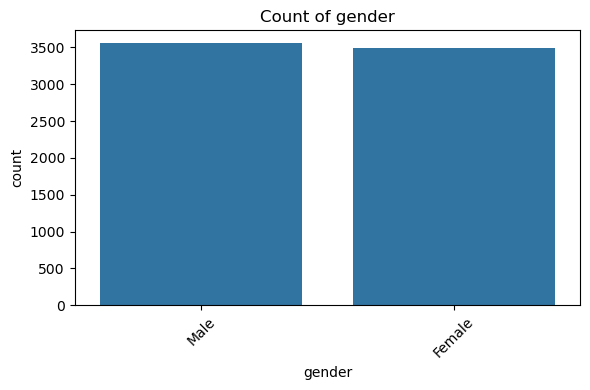

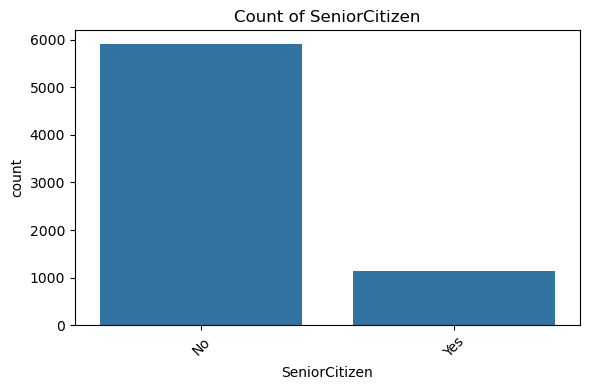

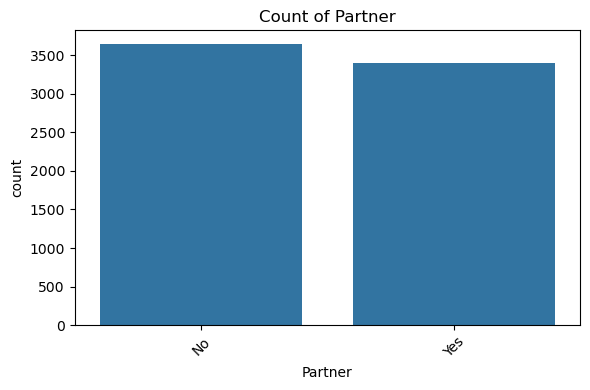

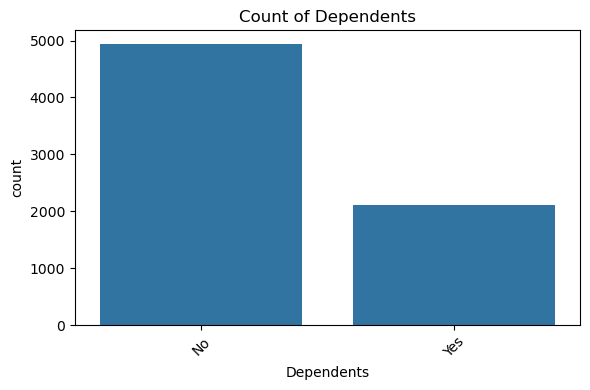

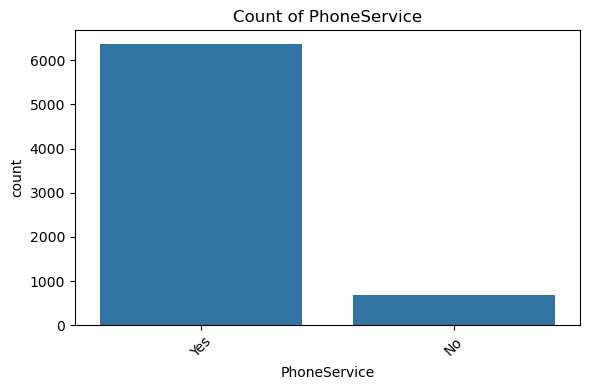

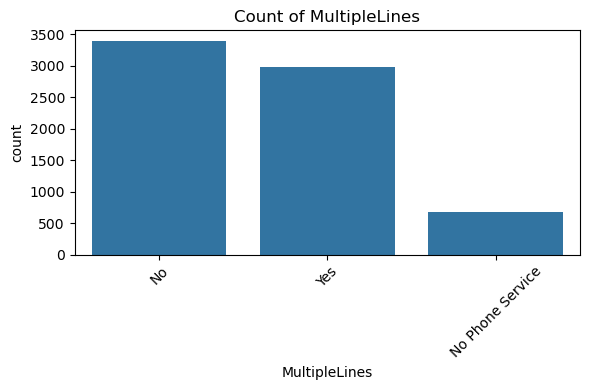

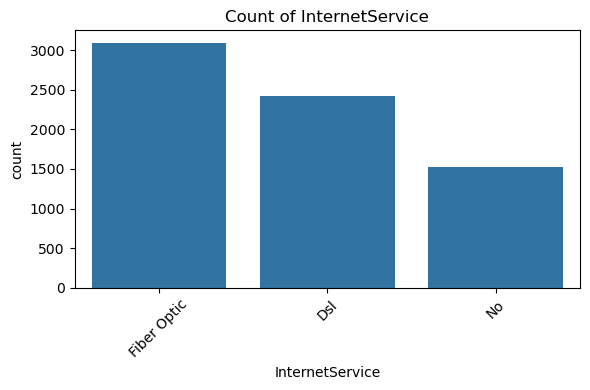

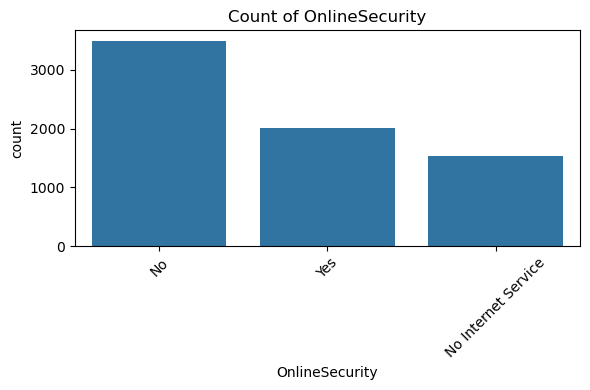

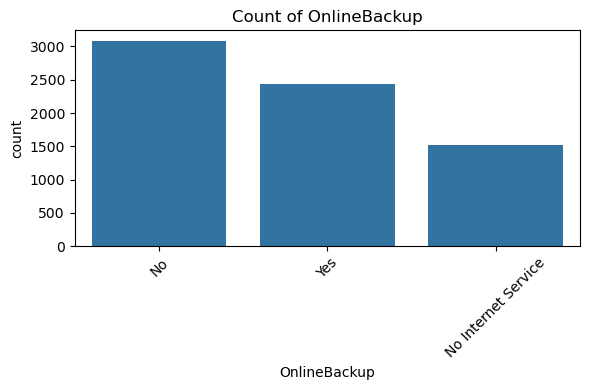

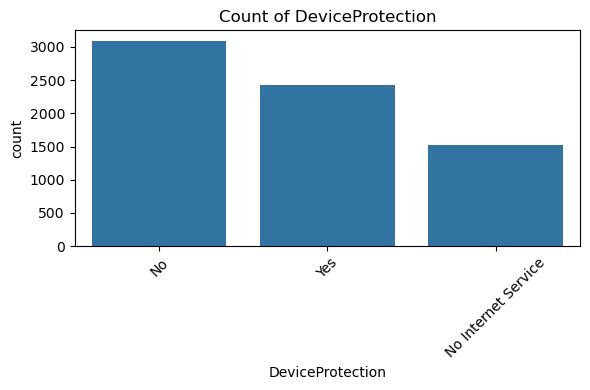

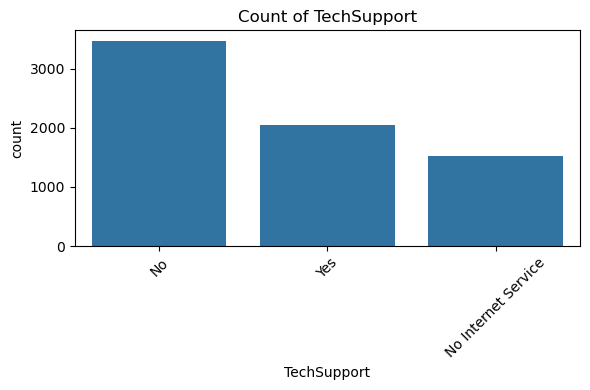

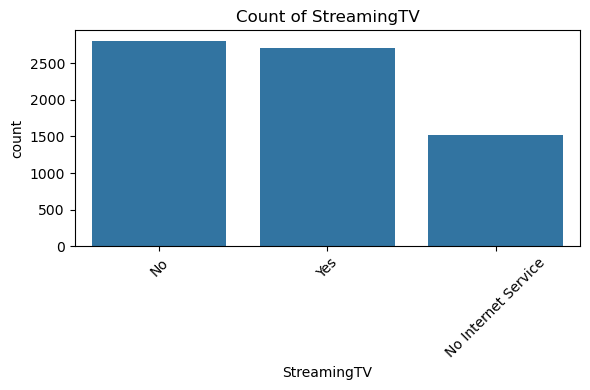

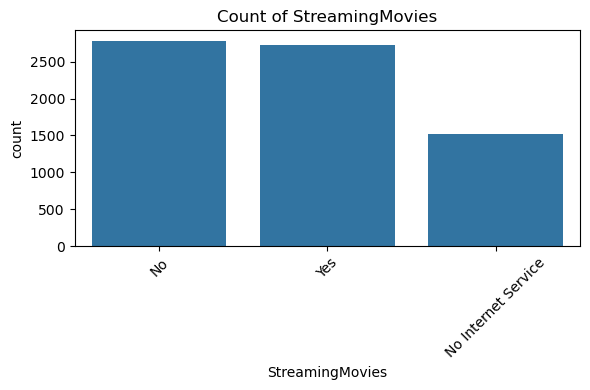

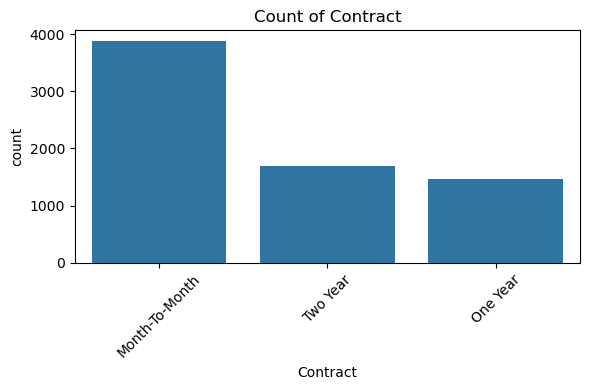

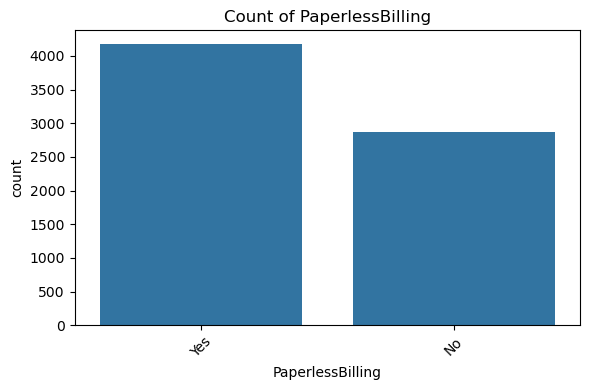

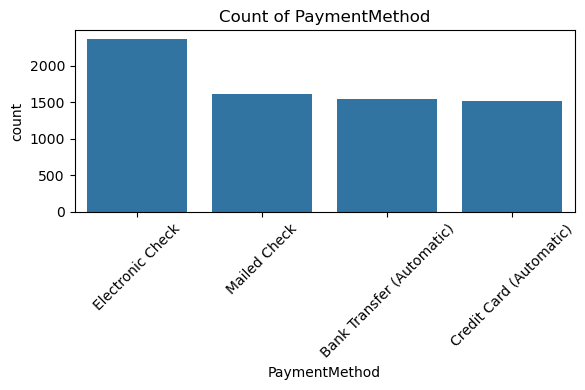

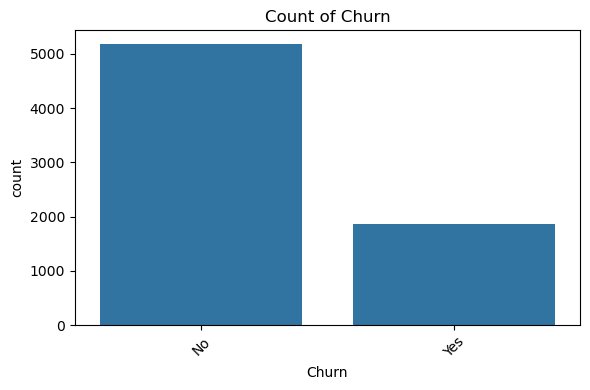

In [277]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Bivariate Analysis

#### Numerical Variables vs. Churn

C:\Users\wasee\AppData\Local\Temp\ipykernel_13960\3126008083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=col, palette='Set2')


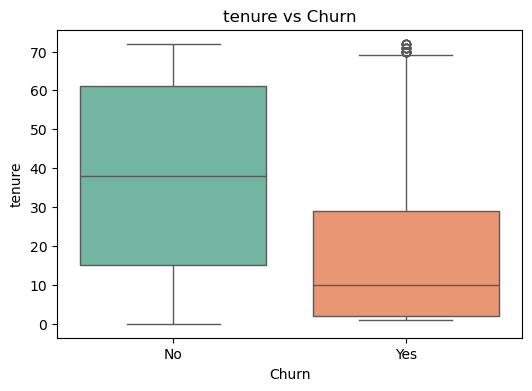

C:\Users\wasee\AppData\Local\Temp\ipykernel_13960\3126008083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=col, palette='Set2')


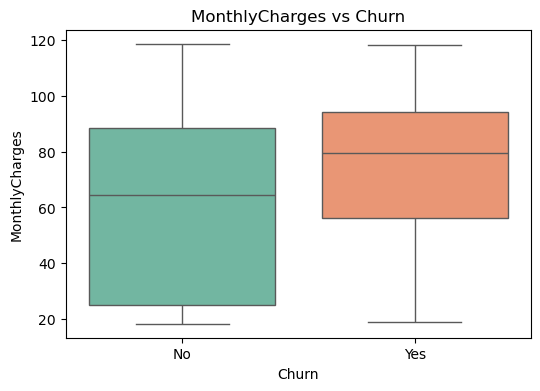

C:\Users\wasee\AppData\Local\Temp\ipykernel_13960\3126008083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=col, palette='Set2')


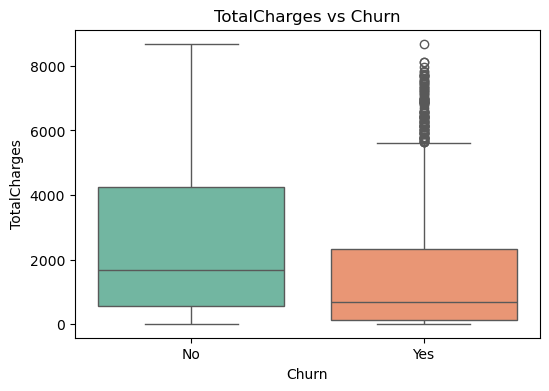

In [280]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Boxplots to show the distribution of numerical features based on Churn
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, x='Churn', y=col, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.show()


#### Churn Proportions for Categorical Features

<Figure size 600x400 with 0 Axes>

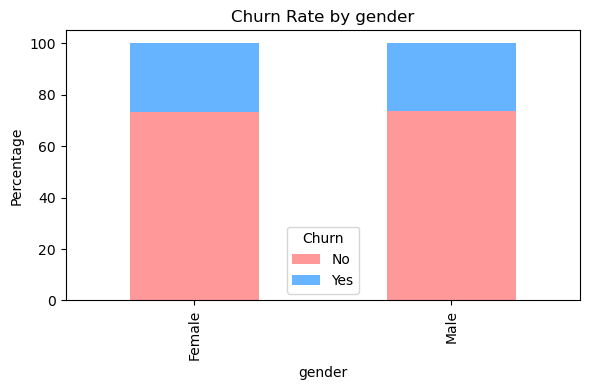

<Figure size 600x400 with 0 Axes>

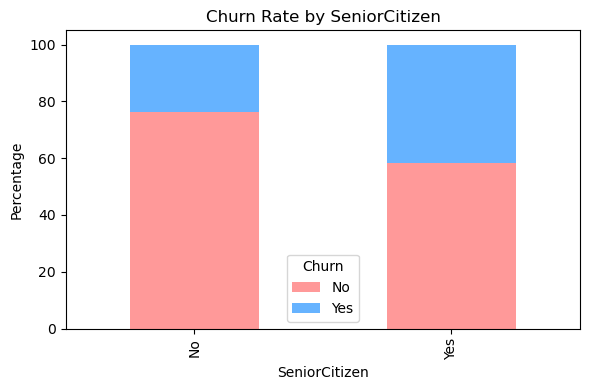

<Figure size 600x400 with 0 Axes>

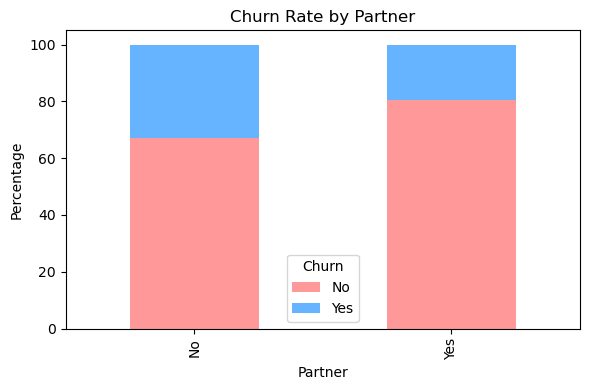

<Figure size 600x400 with 0 Axes>

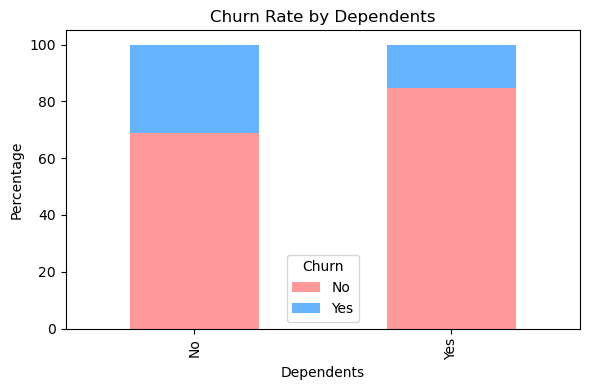

<Figure size 600x400 with 0 Axes>

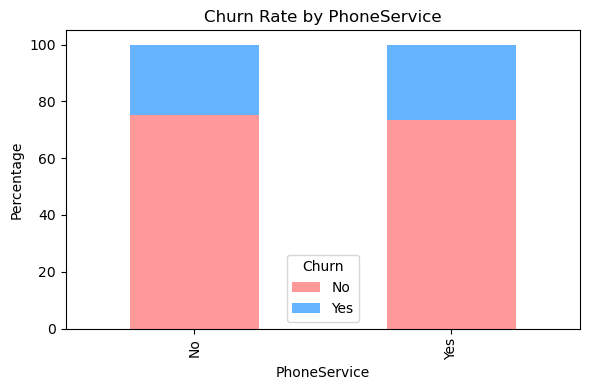

<Figure size 600x400 with 0 Axes>

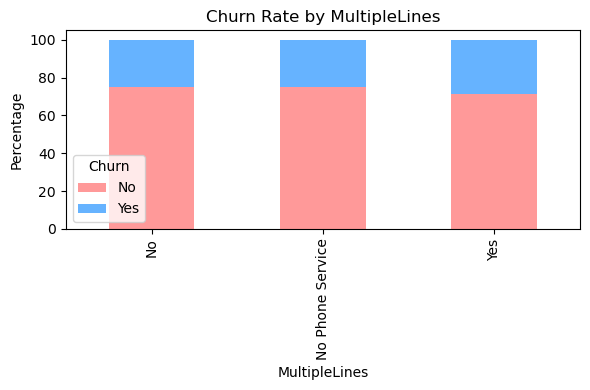

<Figure size 600x400 with 0 Axes>

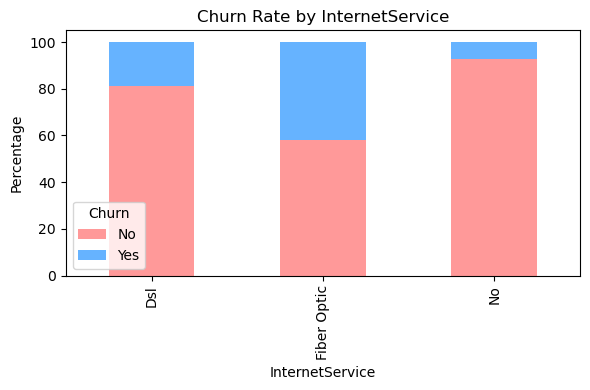

<Figure size 600x400 with 0 Axes>

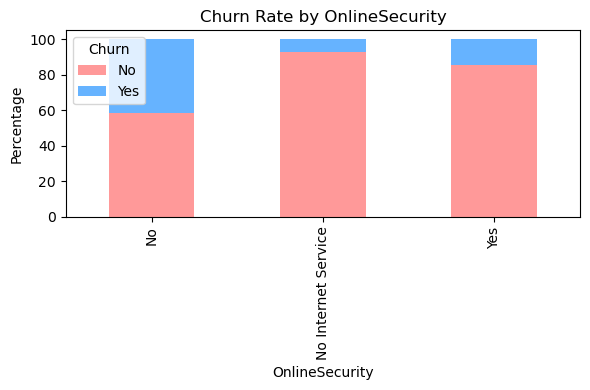

<Figure size 600x400 with 0 Axes>

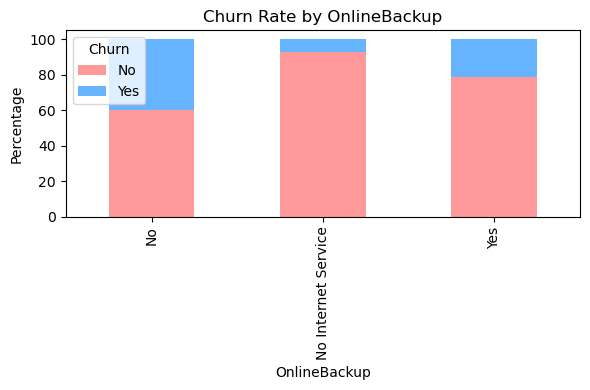

<Figure size 600x400 with 0 Axes>

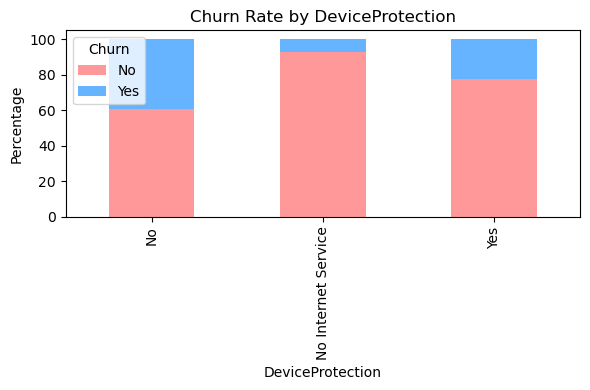

<Figure size 600x400 with 0 Axes>

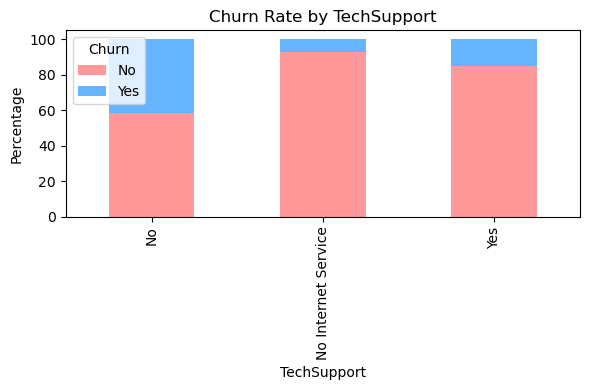

<Figure size 600x400 with 0 Axes>

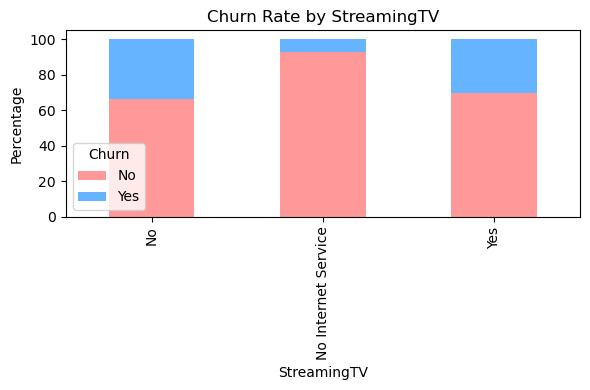

<Figure size 600x400 with 0 Axes>

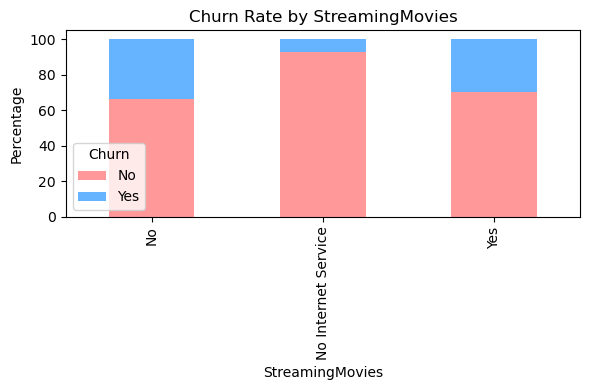

<Figure size 600x400 with 0 Axes>

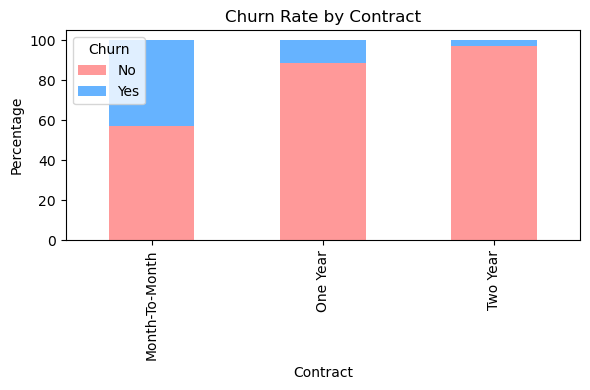

<Figure size 600x400 with 0 Axes>

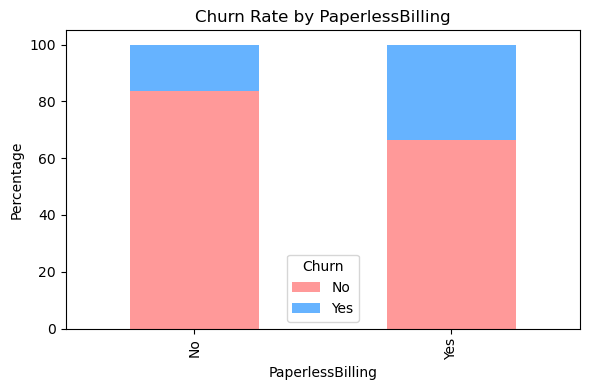

<Figure size 600x400 with 0 Axes>

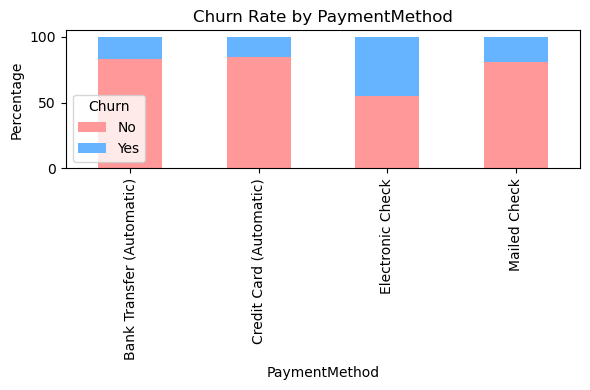

In [284]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

# Bar plots for churn proportion based on categorical features
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    ct = pd.crosstab(data[col], data['Churn'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, figsize=(6,4), color=['#ff9999', '#66b3ff'])
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


#### Chi-Square Test for Independence (Categorical Features)

In [286]:
from scipy.stats import chi2_contingency

# Chi-square test for each categorical feature
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test for {col}: p-value = {p}')
# Interpretation: If the p-value is less than 0.05, it suggests a significant relationship between the feature and churn. 
# A higher p-value indicates a weaker relationship.

Chi-square test for gender: p-value = 0.48657873605618596
Chi-square test for SeniorCitizen: p-value = 1.510066805092378e-36
Chi-square test for Partner: p-value = 2.1399113440759935e-36
Chi-square test for Dependents: p-value = 4.9249216612154196e-43
Chi-square test for PhoneService: p-value = 0.3387825358066928
Chi-square test for MultipleLines: p-value = 0.0034643829548773003
Chi-square test for InternetService: p-value = 9.571788222840544e-160
Chi-square test for OnlineSecurity: p-value = 2.661149635176552e-185
Chi-square test for OnlineBackup: p-value = 2.0797592160864276e-131
Chi-square test for DeviceProtection: p-value = 5.505219496457244e-122
Chi-square test for TechSupport: p-value = 1.4430840279998987e-180
Chi-square test for StreamingTV: p-value = 5.528994485739183e-82
Chi-square test for StreamingMovies: p-value = 2.667756755723681e-82
Chi-square test for Contract: p-value = 5.863038300673391e-258
Chi-square test for PaperlessBilling: p-value = 4.073354668665985e-58
Chi-sq

#### Correlation Matrix (Numerical Features)

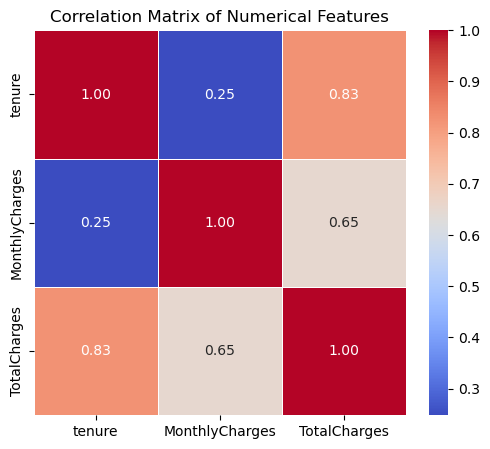

In [289]:
# Correlation matrix of numerical features
plt.figure(figsize=(6,5))
correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


#### Multivariate Analysis

#### Pairplot of Numerical Variables by Churn

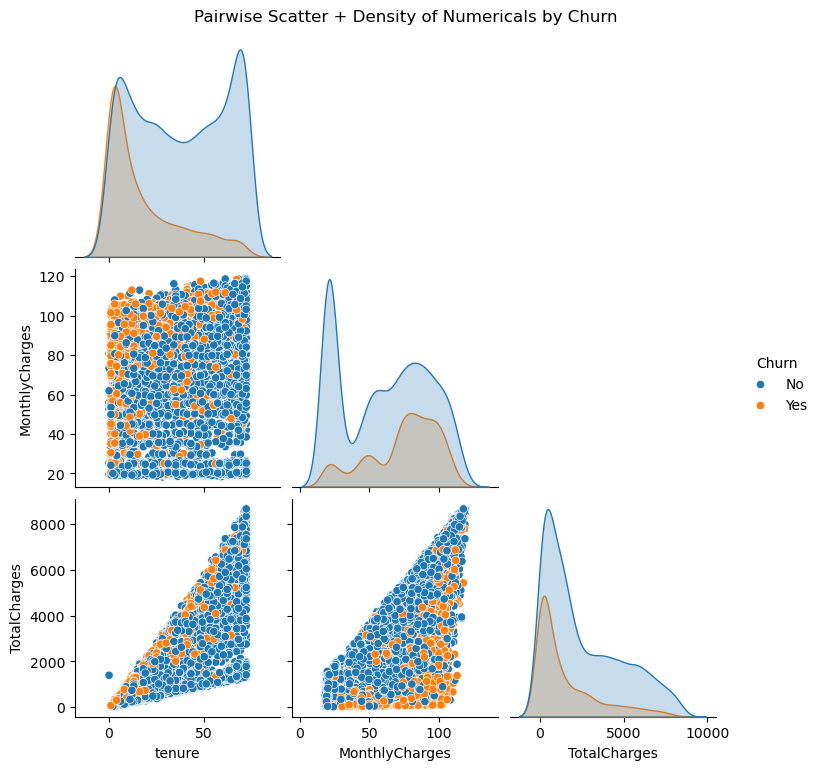

In [294]:
# List of numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Pairplot: every pair of numerical feature, hue by Churn
sns.pairplot(data, vars=numerical_cols, hue='Churn', corner=True)
plt.suptitle('Pairwise Scatter + Density of Numericals by Churn', y=1.02)
plt.show()


#### Churn-Rate Heatmap (Contract × PaymentMethod)

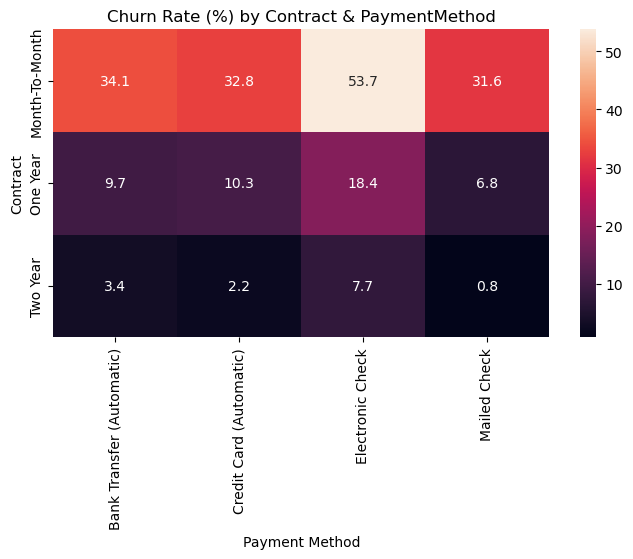

In [296]:
# Crosstab of churn rate by Contract and PaymentMethod
churn_rate = pd.crosstab(
    data['Contract'],
    data['PaymentMethod'],
    values=(data['Churn']=='Yes').astype(int),
    aggfunc='mean'
) * 100

plt.figure(figsize=(8,4))
sns.heatmap(churn_rate, annot=True, fmt=".1f")
plt.title('Churn Rate (%) by Contract & PaymentMethod')
plt.ylabel('Contract')
plt.xlabel('Payment Method')
plt.show()


#### Boxplots of MonthlyCharges by Contract & Churn

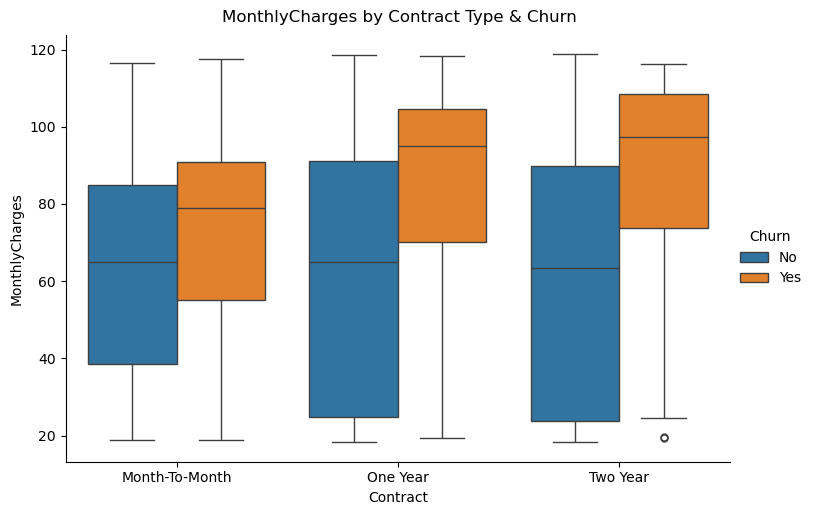

In [300]:
# Create boxplots of MonthlyCharges by Contract & Churn
g = sns.catplot(
    data=data, x='Contract', y='MonthlyCharges',
    hue='Churn', kind='box',
    height=5, aspect=1.5
)
g.fig.suptitle('MonthlyCharges by Contract Type & Churn', y=1.02)
plt.show()


#### Scatter of Tenure vs. TotalCharges Colored by InternetService

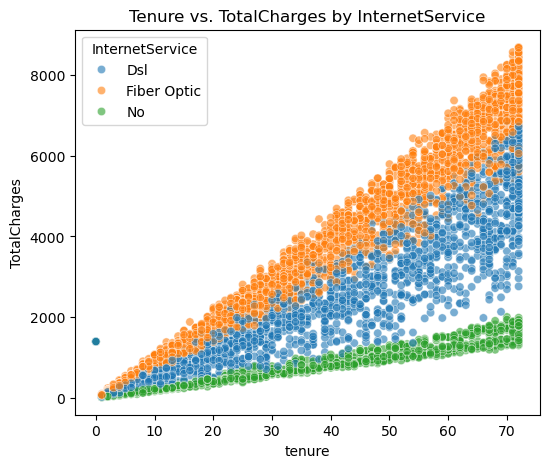

In [303]:
# Scatter plot of Tenure vs TotalCharges colored by InternetService
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=data, x='tenure', y='TotalCharges',
    hue='InternetService', alpha=0.6
)
plt.title('Tenure vs. TotalCharges by InternetService')
plt.show()


#### Outlier detection using the graph

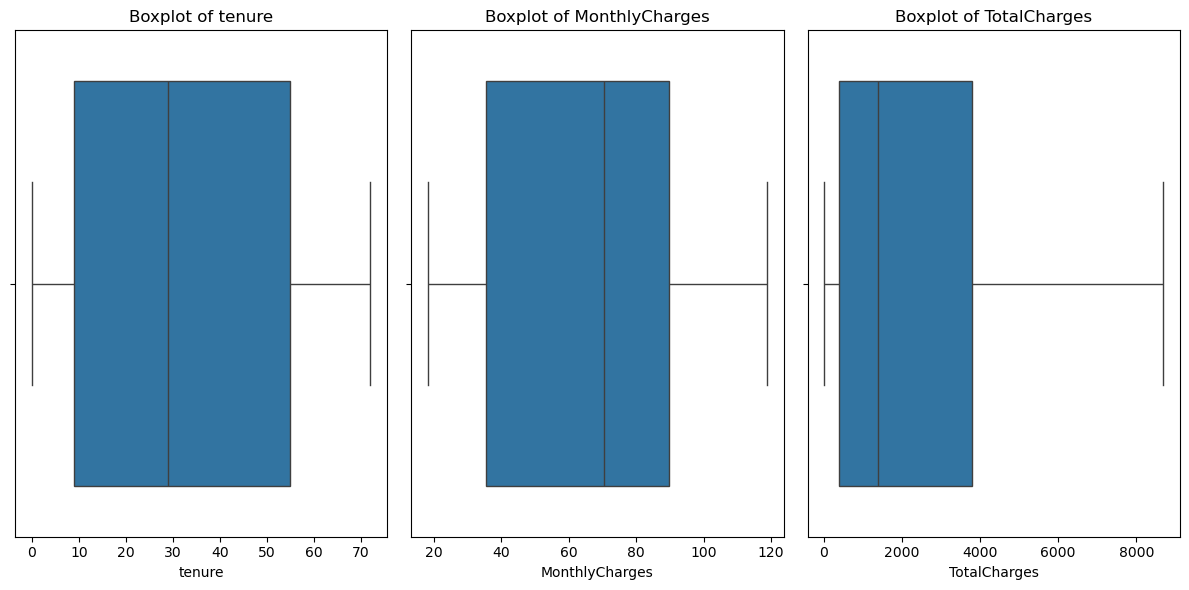

In [306]:
# List of numeric columns in your dataset
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set the figure size for better visualization
plt.figure(figsize=(12, 6))

# Create boxplots for each numeric column to detect outliers
for i, column in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()

#### Churn Trend Across Customer Lifetime (Tenure in Months)

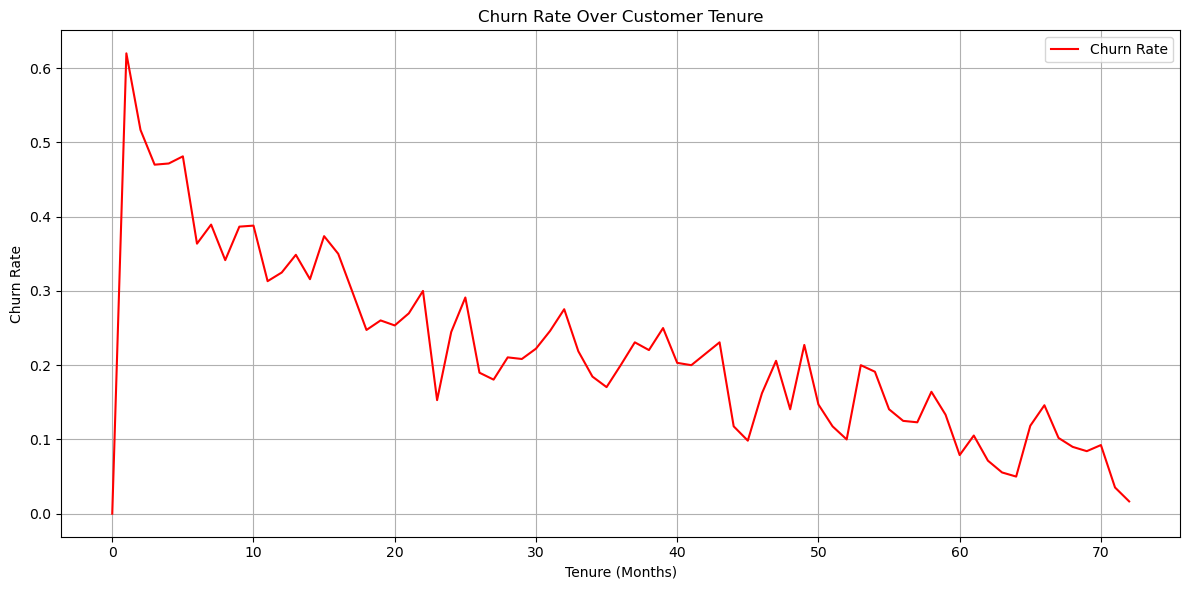

In [309]:
# Because 'Churn' is 'Yes' or 'No'
# Group by tenure and calculate churn rate
churn_by_tenure = data.groupby('tenure')['Churn'].value_counts(normalize=True).unstack().fillna(0)

# Plot churn rate over tenure
plt.figure(figsize=(12,6))
plt.plot(churn_by_tenure.index, churn_by_tenure['Yes'], color='red', label='Churn Rate')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Over Customer Tenure')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 6: Feature Engineering

#### Total Number of Services Subscribed

In [313]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

data['num_services'] = data[service_cols].apply(lambda x: sum(x != 'No'), axis=1)


#### Is Senior Citizen + Living Alone

In [316]:
data['senior_alone'] = ((data['SeniorCitizen'] == 'Yes') & (data['Partner'] == 'No') & (data['Dependents'] == 'No')).astype(int)


#### Average Monthly Spend

In [319]:
data['avg_monthly_spend'] = data['TotalCharges'] / data['tenure'].replace(0, 1)


#### Has internet

In [322]:
data['has_internet'] = data['InternetService'].apply(lambda x: 0 if x == 'No' else 1)

#### High value customer

In [325]:
data['high_value_customer'] = ((data['MonthlyCharges'] > 80) & (data['tenure'] > 24)).astype(int)


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7043 non-null   object  
 1   gender               7043 non-null   category
 2   SeniorCitizen        7043 non-null   category
 3   Partner              7043 non-null   category
 4   Dependents           7043 non-null   category
 5   tenure               7043 non-null   int64   
 6   PhoneService         7043 non-null   category
 7   MultipleLines        7043 non-null   category
 8   InternetService      7043 non-null   category
 9   OnlineSecurity       7043 non-null   category
 10  OnlineBackup         7043 non-null   category
 11  DeviceProtection     7043 non-null   category
 12  TechSupport          7043 non-null   category
 13  StreamingTV          7043 non-null   category
 14  StreamingMovies      7043 non-null   category
 15  Contract             

In [329]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,num_services,senior_alone,avg_monthly_spend,has_internet,high_value_customer
0,7590-Vhveg,Female,No,Yes,No,1,No,No Phone Service,Dsl,No,...,Yes,Electronic Check,29.85,29.85,No,3,0,29.850000,1,0
1,5575-Gnvde,Male,No,No,No,34,Yes,No,Dsl,Yes,...,No,Mailed Check,56.95,1889.50,No,4,0,55.573529,1,0
2,3668-Qpybk,Male,No,No,No,2,Yes,No,Dsl,Yes,...,Yes,Mailed Check,53.85,108.15,Yes,4,0,54.075000,1,0
3,7795-Cfocw,Male,No,No,No,45,No,No Phone Service,Dsl,Yes,...,No,Bank Transfer (Automatic),42.30,1840.75,No,5,0,40.905556,1,0
4,9237-Hqitu,Female,No,No,No,2,Yes,No,Fiber Optic,No,...,Yes,Electronic Check,70.70,151.65,Yes,2,0,75.825000,1,0


#### Data Modeling 

In [332]:
# Create surrogate keys using continuous numbers
data['Cus_id'] = range(1, len(data) + 1)
data['Service_id'] = range(1, len(data) + 1)
data['Contract_id'] = range(1, len(data) + 1)
data['Churn_id'] = range(1, len(data) + 1)

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7043 non-null   object  
 1   gender               7043 non-null   category
 2   SeniorCitizen        7043 non-null   category
 3   Partner              7043 non-null   category
 4   Dependents           7043 non-null   category
 5   tenure               7043 non-null   int64   
 6   PhoneService         7043 non-null   category
 7   MultipleLines        7043 non-null   category
 8   InternetService      7043 non-null   category
 9   OnlineSecurity       7043 non-null   category
 10  OnlineBackup         7043 non-null   category
 11  DeviceProtection     7043 non-null   category
 12  TechSupport          7043 non-null   category
 13  StreamingTV          7043 non-null   category
 14  StreamingMovies      7043 non-null   category
 15  Contract             

In [336]:
print(data.head())

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-Vhveg  Female            No     Yes         No       1           No   
1  5575-Gnvde    Male            No      No         No      34          Yes   
2  3668-Qpybk    Male            No      No         No       2          Yes   
3  7795-Cfocw    Male            No      No         No      45           No   
4  9237-Hqitu  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... Churn num_services  \
0  No Phone Service             Dsl             No  ...    No            3   
1                No             Dsl            Yes  ...    No            4   
2                No             Dsl            Yes  ...   Yes            4   
3  No Phone Service             Dsl            Yes  ...    No            5   
4                No     Fiber Optic             No  ...   Yes            2   

  senior_alone avg_monthly_spend has_internet high_value

In [338]:
data_cleaned.to_csv('cleaned_churn_data.csv', index=False)

print("Cleaned CSV file exported successfully!")

Cleaned CSV file exported successfully!


####  FactChurn 

In [341]:
fact_churn = data[['Churn_id','Cus_id', 'Service_id', 'Contract_id', 'tenure', 'MonthlyCharges',
                   'TotalCharges', 'num_services', 'senior_alone', 'avg_monthly_spend',
                   'has_internet', 'high_value_customer', 'Churn']].copy()


In [343]:
print("FactChurn Table:")
print(fact_churn.head(), "\n")

FactChurn Table:
   Churn_id  Cus_id  Service_id  Contract_id  tenure  MonthlyCharges  \
0         1       1           1            1       1           29.85   
1         2       2           2            2      34           56.95   
2         3       3           3            3       2           53.85   
3         4       4           4            4      45           42.30   
4         5       5           5            5       2           70.70   

   TotalCharges  num_services  senior_alone  avg_monthly_spend  has_internet  \
0         29.85             3             0          29.850000             1   
1       1889.50             4             0          55.573529             1   
2        108.15             4             0          54.075000             1   
3       1840.75             5             0          40.905556             1   
4        151.65             2             0          75.825000             1   

   high_value_customer Churn  
0                    0    No  
1      

#### DimCustomer

In [346]:
#Dimension Table for Customer
dim_customer = data[['Cus_id', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']].drop_duplicates().copy()


In [348]:
# Print DimCustomer table
print("DimCustomer Table:")
print(dim_customer.head(), "\n")

DimCustomer Table:
   Cus_id  customerID  gender SeniorCitizen Partner Dependents
0       1  7590-Vhveg  Female            No     Yes         No
1       2  5575-Gnvde    Male            No      No         No
2       3  3668-Qpybk    Male            No      No         No
3       4  7795-Cfocw    Male            No      No         No
4       5  9237-Hqitu  Female            No      No         No 



#### DimService

In [351]:
# Dimension Table for Service
dim_service = data[['Service_id', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].drop_duplicates().copy()

In [353]:
print("DimService Table:")
print(dim_service.head(), "\n")


DimService Table:
   Service_id PhoneService     MultipleLines InternetService OnlineSecurity  \
0           1           No  No Phone Service             Dsl             No   
1           2          Yes                No             Dsl            Yes   
2           3          Yes                No             Dsl            Yes   
3           4           No  No Phone Service             Dsl            Yes   
4           5          Yes                No     Fiber Optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No   



#### DimContract

In [356]:
# Dimension Table for Contract
dim_contract = data[['Contract_id', 'Contract', 'PaperlessBilling', 'PaymentMethod']].drop_duplicates().copy()

In [358]:
print("DimContract Table:")
print(dim_contract.head(), "\n")

DimContract Table:
   Contract_id        Contract PaperlessBilling              PaymentMethod
0            1  Month-To-Month              Yes           Electronic Check
1            2        One Year               No               Mailed Check
2            3  Month-To-Month              Yes               Mailed Check
3            4        One Year               No  Bank Transfer (Automatic)
4            5  Month-To-Month              Yes           Electronic Check 



In [360]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,num_services,senior_alone,avg_monthly_spend,has_internet,high_value_customer,Cus_id,Service_id,Contract_id,Churn_id
0,7590-Vhveg,Female,No,Yes,No,1,No,No Phone Service,Dsl,No,...,No,3,0,29.850000,1,0,1,1,1,1
1,5575-Gnvde,Male,No,No,No,34,Yes,No,Dsl,Yes,...,No,4,0,55.573529,1,0,2,2,2,2
2,3668-Qpybk,Male,No,No,No,2,Yes,No,Dsl,Yes,...,Yes,4,0,54.075000,1,0,3,3,3,3
3,7795-Cfocw,Male,No,No,No,45,No,No Phone Service,Dsl,Yes,...,No,5,0,40.905556,1,0,4,4,4,4
4,9237-Hqitu,Female,No,No,No,2,Yes,No,Fiber Optic,No,...,Yes,2,0,75.825000,1,0,5,5,5,5


####  Establish Connection to SQL Server using SQLAlchemy and pyodbc

In [377]:
connection_string = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-U7AOA5H\\MSSQLSERVER2022;"
    "DATABASE=TelcoCustomerChurn;"
    "Trusted_Connection=yes;"
)

params = quote_plus(connection_string)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")


In [ ]:
dim_customer.to_sql('Dim_customer', con=engine, if_exists='append', index=False)

In [ ]:
dim_service.to_sql('Dim_service', con=engine, if_exists='append', index=False)

In [ ]:
dim_contract.to_sql('Dim_contract', con=engine, if_exists='append', index=False)

In [ ]:
fact_churn.to_sql('Fact_churn', con=engine, if_exists='append', index=False)

#### End of import to SQL Server

In [374]:
print("Data has been successfully imported to SQL Server.")

Data has been successfully imported to SQL Server.
